## 6.06 GNOD clustering


more songs to create the clustering model: larger datasets that have already been scraped and saved as a .csv file. You can add these to your own scraped data. Here are some links to try:

[Datasets 1960 - 2019](https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset?select=README.txt)
[Datasets 1921 - 2020](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv)
[General Song Datasets](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

## Clustering Kmeans

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
#we can do Kmeans since variables are numerical

In [43]:
data=pd.read_csv('spotify_10000_audio_features.csv')


### Normalize

In [44]:
X_data = data[[ 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [45]:
## Alternative code to pickle for later
scaler = StandardScaler()
scaler = scaler.fit(X_data)
X_scaled = scaler.transform(X_data)

In [46]:
import pickle
with open('scaler_spotify.pkl', 'wb') as f: 
    pickle.dump(scaler, f) 

### determine cluster number


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

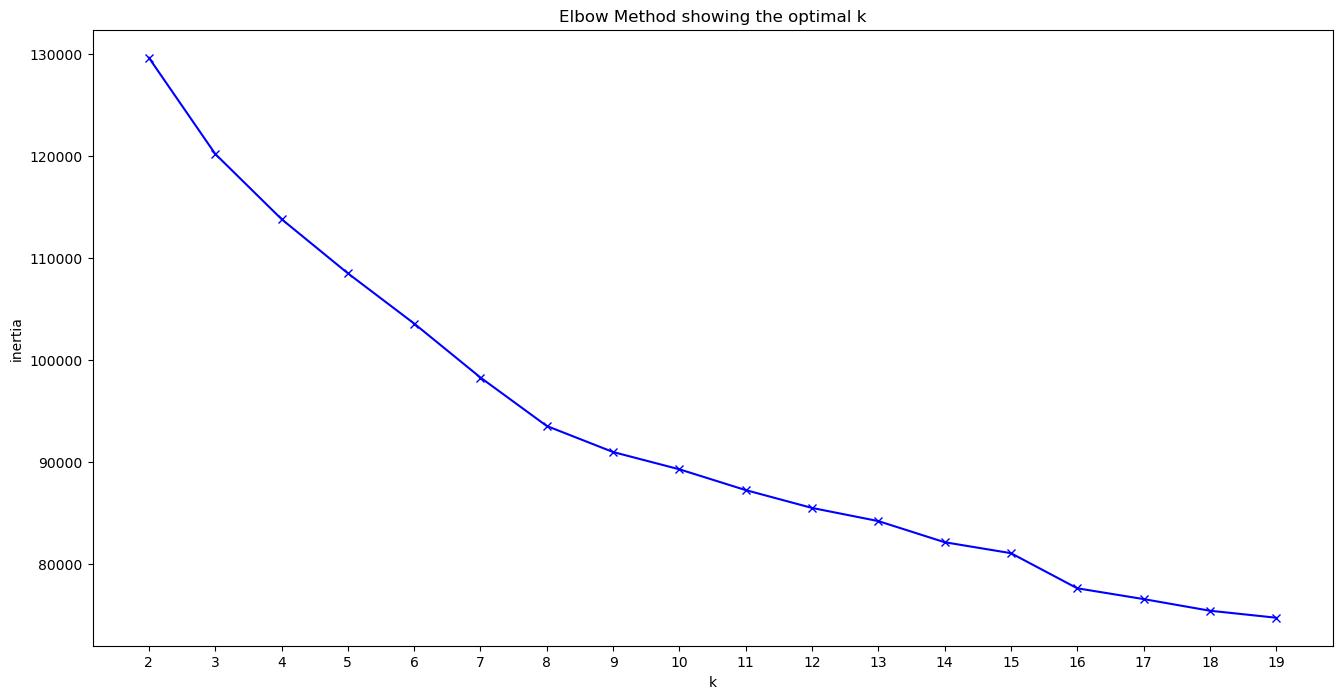

In [29]:

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto',
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Anne-so1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/A

Text(0.5, 1.0, 'Silhouette score large playlist')

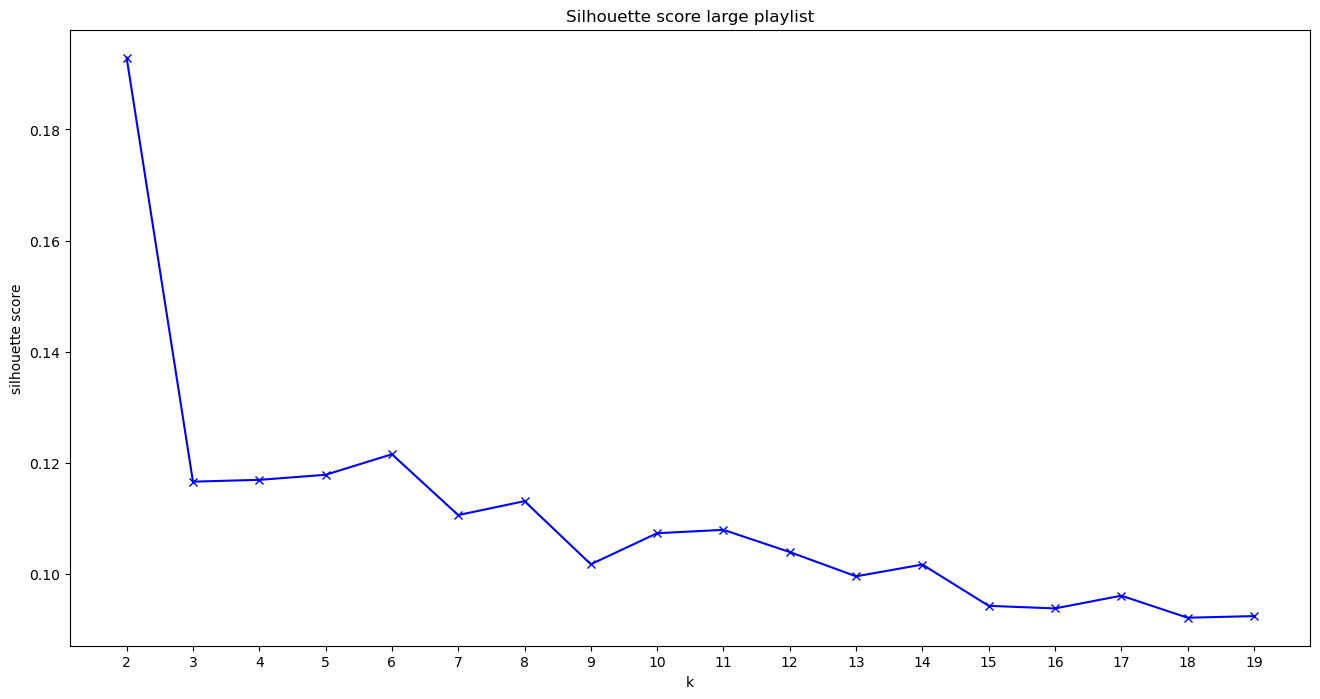

In [30]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score large playlist')

### clusters for large playlist

In [47]:
#optimal k is 8
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init= 1, 
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

86590.85359986362


In [48]:
clusters = kmeans.predict(X_scaled)
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()
#clusters are imbalanced

0     635
1    2084
2    2640
3      53
4    2060
5     833
6     957
7    2509
Name: count, dtype: int64

In [49]:
data['cluster'] = clusters
data.to_csv('spotify_10000_with_clusters.csv', index=False)

In [50]:
import pickle
with open('kmeans_model_spotify.pkl', 'wb') as f: #wb is writing
    pickle.dump(kmeans, f) #dump saves in a pickle

## Using kaggle dataset

Text(0.5, 1.0, 'Silhouette score (kaggle data)')

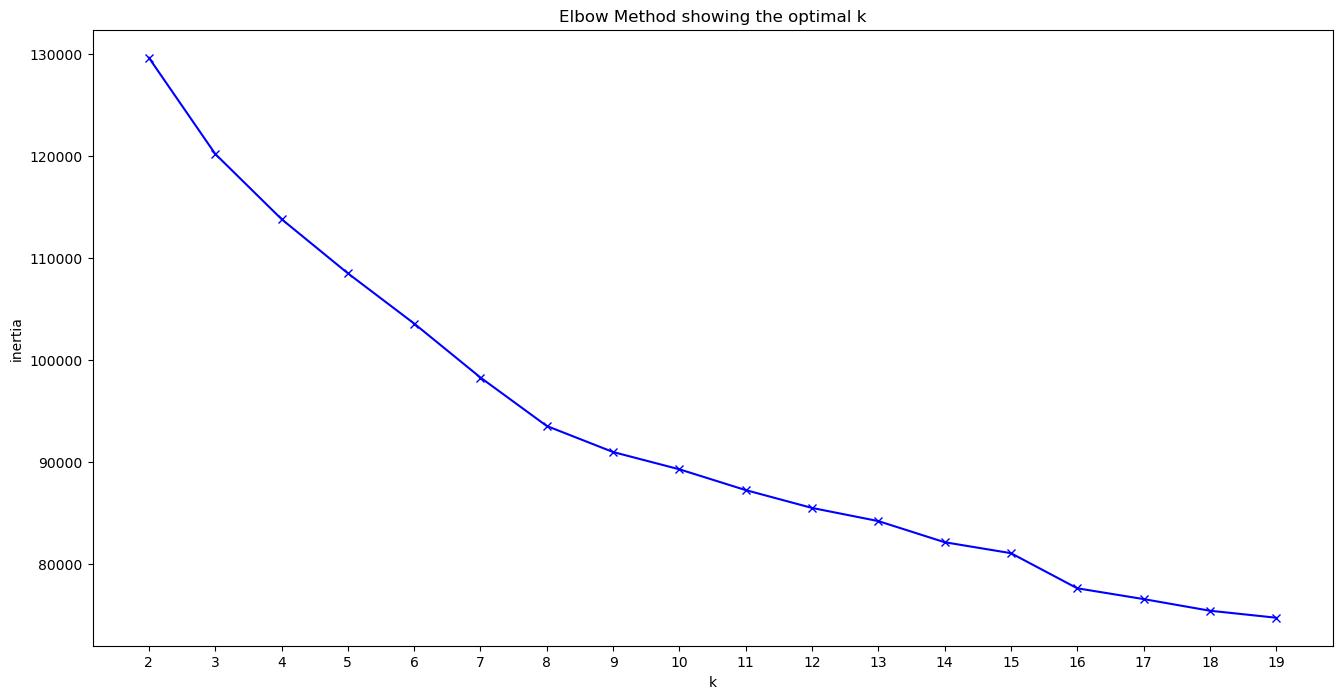

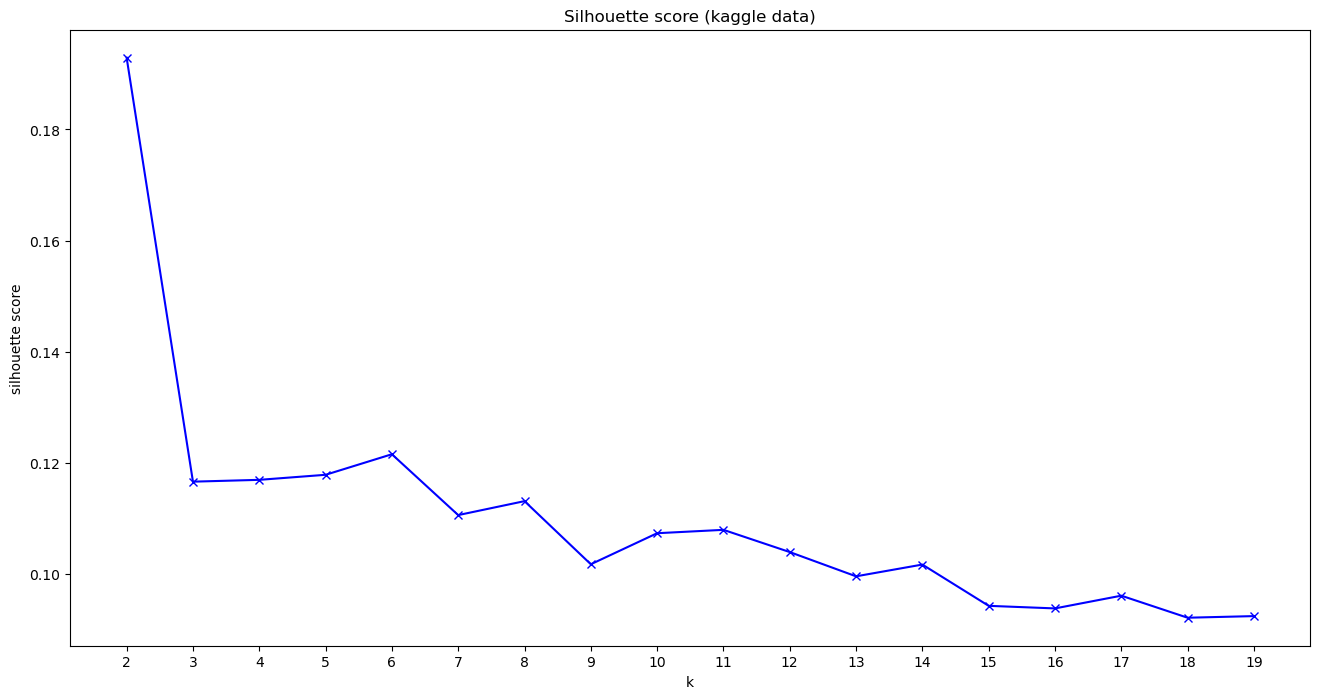

In [28]:
data2=pd.read_csv('dataset_kaggle_songs.csv')
#70k rows!

#time_signature instead of duration_ms
X_data2 = data[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
X_scaled2 = StandardScaler().fit_transform(X_data2)


K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto',
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')


silhouette = []

for k in K:
    kmeans2 = KMeans(n_clusters=k, n_init=10,
                    random_state=1234)
    kmeans2.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans2.predict(X_scaled2)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score (kaggle data)')



In [32]:
kmeans2 = KMeans(n_clusters=8,
                init="random",
                n_init= 1, 
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans2.fit(X_scaled)
print("Inertia (kaggle data) 8 kmeans",kmeans2.inertia_)

clusters2 = kmeans2.predict(X_scaled2)
pd.Series(clusters2).value_counts().sort_index()

Inertia (kaggle data) 8 kmeans 97176.44252630636


0     643
1    2104
2    2656
3      54
4    2072
5     819
6     848
7    2575
Name: count, dtype: int64

In [33]:
data2['cluster'] = clusters2
data2.to_csv('kaggle_songs_with_clusters.csv', index=False)

ValueError: Length of values (11771) does not match length of index (114000)